In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt, caesar
from modules.visualize.render_rgb import RenderRGB, SingleRender
import modules as anal
import modules.anal_func as anal_func

In [2]:
plt.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

snap = 149
n = 1

# decide the snapshot
sb = anal.Simba('PC39BP4', size=25)
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/region_snap129_r100_gal000000.h5'
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)

toplot = ['GrackleHI_s', 'Masses', 'Dust_Masses_s']

In [ ]:
render = RenderRGB(snapfile, catfile, n, toplot, region=False, ifdust=True, dim=['Msun', 'Msun', 'Msun'])

yt : [INFO     ] 2024-08-27 14:48:04,473 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2024-08-27 14:48:04,473 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-27 14:48:04,507 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2024-08-27 14:48:04,507 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-27 14:48:04,508 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-27 14:48:04,508 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-27 14:48:04,508 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-27 14:48:04,508 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2024-08-27 14:48:04,509 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-27 14:48:04,509 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-27 14:48:04,509 Parameters: omega_radiation  

Camera settings: Center=[ 6655.9224 12395.905   7572.8145], Extent=100, Theta=153.8222254757163, Phi=116.1777745242837, Roll=0, Radius=100, XSize=400, YSize=400


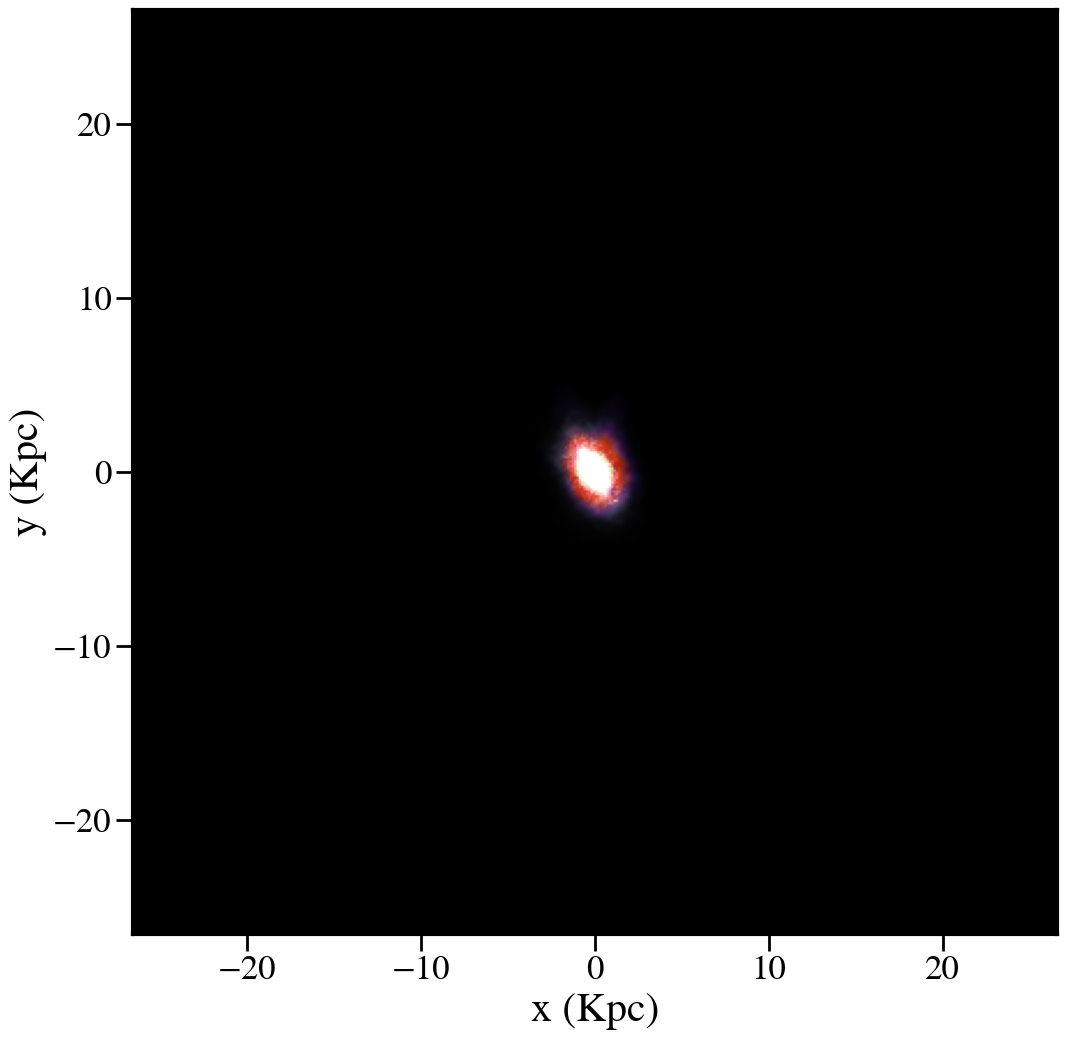

In [4]:
camera = render.set_camera(r=100, p=None, t=None, extent=100, zoom=2, spos='edgeon')
image = render.generate_images(camera, vmin=0, vmax=99.9)
render.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

In [7]:
render.set_video(10, r='infinity', extent=100, t=30, p=0, del_t=0, del_p=360, vmin=0, vmax=99.8, xsize=500, ysize=500, zoom='infinity')
render.create_video(f'snap_{snap}_n{n}', interval=100)
render.flush()

Setting camera with 10 frames, p=0, t=30, r=infinity, extent=100


/home/lorenzong/anaconda3/envs/pd_env/lib/python3.9/site-packages/sphviewer/Render.py:91: RuntimeWarning: invalid value encountered in divide
  self.__image = self.__make_render(Scene._x, Scene._y, Scene._hsml,


GIF saved as /home/lorenzong/analize_simba_cgm/output/plot/videos/snap_129_n0.gif


In [12]:
rendmap = SingleRender(subset, catfile, n, ('PartType4', 'Masses'), region=True, dim='Msun')

yt : [INFO     ] 2024-08-27 14:47:00,654 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-27 14:47:00,655 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-27 14:47:00,682 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-27 14:47:00,682 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-27 14:47:00,683 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-27 14:47:00,683 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-27 14:47:00,683 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-27 14:47:00,683 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-27 14:47:00,684 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-27 14:47:00,684 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-27 14:47:00,684 Parameters: omega_radiation     

Doing region...


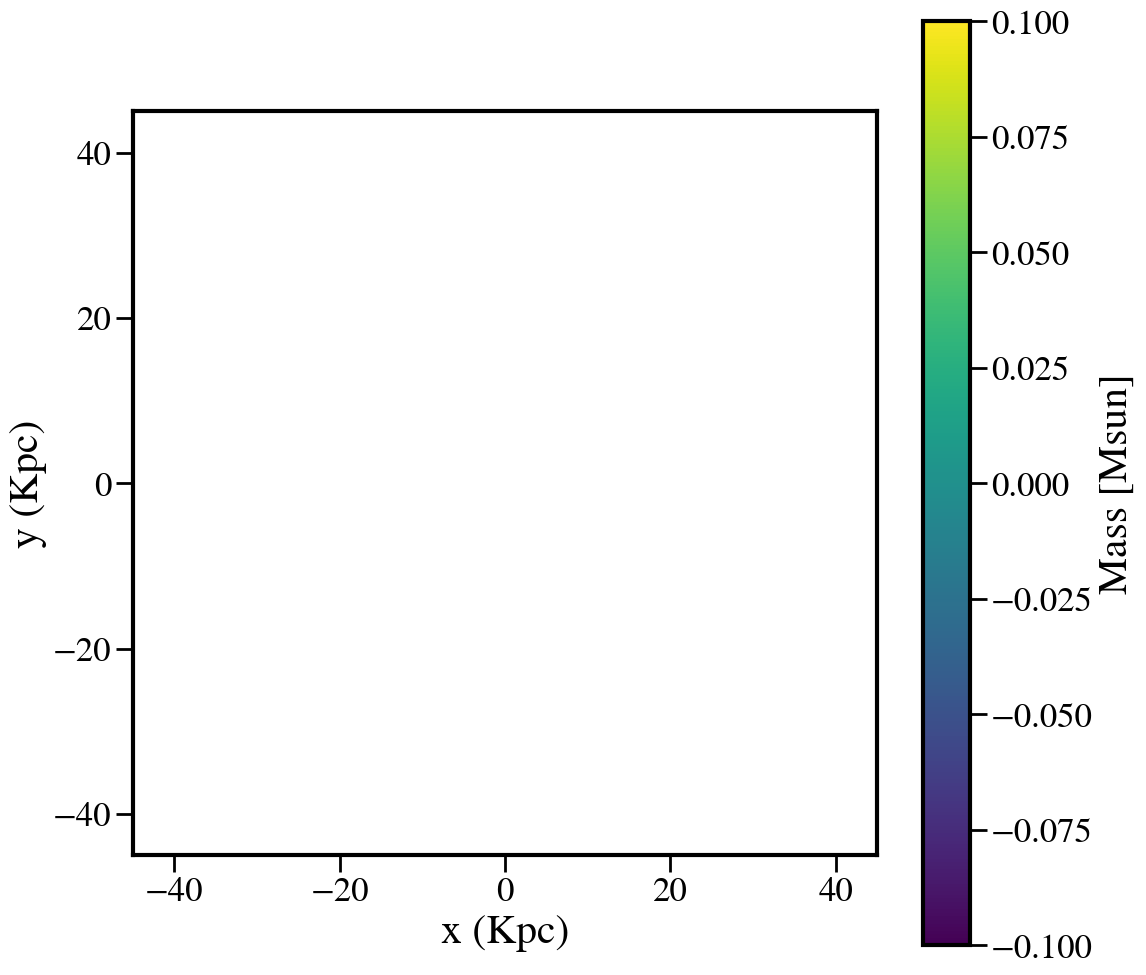

In [13]:
image = rendmap.single_map(r=50, p=None, t=None, extent=50, zoom=1, spos='faceon', cmap='inferno', vmin=10, vmax=95)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')